In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from empiricaldist  import Pmf
from empiricaldist  import Cdf

%matplotlib inline

In [4]:
df=pd.read_csv('data2004-2012.csv')
df

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
0,2004,AL,Autauga County,01001,15196,4758,127,20081,75.70,23.70,0.60,rep,dem,75.70,52.00
1,2004,AL,Baldwin County,01003,52971,15599,750,69320,76.40,22.50,1.10,rep,dem,76.40,53.90
2,2004,AL,Barbour County,01005,5899,4832,46,10777,54.70,44.80,0.40,rep,dem,54.70,9.90
3,2004,AL,Bibb County,01007,5472,2089,39,7600,72.00,27.50,0.50,rep,dem,72.00,44.50
4,2004,AL,Blount County,01009,17386,3938,180,21504,80.90,18.30,0.80,rep,dem,80.90,62.60
5,2004,AL,Bullock County,01011,1494,3210,13,4717,31.70,68.10,0.30,dem,rep,68.10,36.40
6,2004,AL,Butler County,01013,4979,3413,24,8416,59.20,40.60,0.30,rep,dem,59.20,18.60
7,2004,AL,Calhoun County,01015,29814,15083,352,45249,65.90,33.30,0.80,rep,dem,65.90,32.60
8,2004,AL,Chambers County,01017,7622,5347,63,13032,58.50,41.00,0.50,rep,dem,58.50,17.50
9,2004,AL,Cherokee County,01019,5923,3040,86,9049,65.50,33.60,1.00,rep,dem,65.50,31.90


In [5]:
df.info

<bound method DataFrame.info of       year state                   county   fips  vote_rep  vote_dem  \
0     2004    AL           Autauga County  01001     15196      4758   
1     2004    AL           Baldwin County  01003     52971     15599   
2     2004    AL           Barbour County  01005      5899      4832   
3     2004    AL              Bibb County  01007      5472      2089   
4     2004    AL            Blount County  01009     17386      3938   
5     2004    AL           Bullock County  01011      1494      3210   
6     2004    AL            Butler County  01013      4979      3413   
7     2004    AL           Calhoun County  01015     29814     15083   
8     2004    AL          Chambers County  01017      7622      5347   
9     2004    AL          Cherokee County  01019      5923      3040   
10    2004    AL           Chilton County  01021     12829      3778   
11    2004    AL           Choctaw County  01023      3897      3303   
12    2004    AL            Clar

In [21]:
df.describe()

,year,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,pct_winner,margin_winner_over_runnerup
count,9459.000000,9.459000e+03,9.459000e+03,9459.000000,9.459000e+03,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000
mean,2008.000000,1.935004e+04,2.056764e+04,551.483666,4.048481e+04,58.893639,39.603116,1.504569,63.192774,27.887056
std,3.266159,4.547637e+04,7.205181e+04,1828.470363,1.153165e+05,13.818724,13.806798,0.983639,9.484931,18.881025
min,2004.000000,5.400000e+01,5.000000e+00,0.000000,6.400000e+01,5.980000,0.550000,0.000000,44.170000,0.000000
25%,2004.000000,2.929500e+03,1.731000e+03,55.000000,4.958000e+03,50.165000,29.735000,0.800000,55.315000,12.200000
50%,2008.000000,6.333000e+03,4.170000e+03,143.000000,1.074100e+04,59.670000,38.800000,1.390000,61.800000,25.170000
75%,2012.000000,1.593900e+04,1.131350e+04,401.500000,2.783250e+04,68.715000,48.300000,2.000000,69.780000,41.010000
max,2012.000000,1.076225e+06,2.295853e+06,78831.000000,3.318248e+06,96.150000,93.390000,34.760000,96.150000,92.850000


                                              Sort data frame and Cleaned it from Null data

In [6]:
df=df.sort_values("pct_dem")
df

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
519,2004,HI,Kalawao County,15005,-9999,-9999,-9999,-9999,-9999.00,-9999.00,-9999.00,dem,rep,-9999.00,0.00
3673,2008,HI,Kalawao County,15005,-9999,-9999,-9999,-9999,-9999.00,-9999.00,-9999.00,dem,rep,-9999.00,0.00
9213,2012,VA,Manassas City,51683,6463,37,222,6722,96.15,0.55,3.30,rep,oth,96.15,92.85
8935,2012,TX,King,48269,139,5,1,145,95.86,3.45,0.69,rep,dem,95.86,92.41
5782,2008,TX,King County,48269,151,8,4,163,92.64,4.91,2.45,rep,dem,92.64,87.73
6861,2012,ID,Madison,16065,13445,832,135,14412,93.29,5.77,0.94,rep,dem,93.29,87.52
6849,2012,ID,Franklin,16041,5195,325,80,5600,92.77,5.80,1.43,rep,dem,92.77,86.97
9016,2012,TX,Sterling,48431,459,31,4,494,92.91,6.28,0.81,rep,dem,92.91,86.63
8997,2012,TX,Roberts,48393,468,33,7,508,92.13,6.50,1.38,rep,dem,92.13,85.63
5251,2008,OH,Washington County,39167,17019,1238,545,18802,90.50,6.60,2.90,rep,dem,90.50,83.90


In [7]:
df=df.drop([519] ,axis=0)
df

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
3673,2008,HI,Kalawao County,15005,-9999,-9999,-9999,-9999,-9999.00,-9999.00,-9999.00,dem,rep,-9999.00,0.00
9213,2012,VA,Manassas City,51683,6463,37,222,6722,96.15,0.55,3.30,rep,oth,96.15,92.85
8935,2012,TX,King,48269,139,5,1,145,95.86,3.45,0.69,rep,dem,95.86,92.41
5782,2008,TX,King County,48269,151,8,4,163,92.64,4.91,2.45,rep,dem,92.64,87.73
6861,2012,ID,Madison,16065,13445,832,135,14412,93.29,5.77,0.94,rep,dem,93.29,87.52
6849,2012,ID,Franklin,16041,5195,325,80,5600,92.77,5.80,1.43,rep,dem,92.77,86.97
9016,2012,TX,Sterling,48431,459,31,4,494,92.91,6.28,0.81,rep,dem,92.91,86.63
8997,2012,TX,Roberts,48393,468,33,7,508,92.13,6.50,1.38,rep,dem,92.13,85.63
5251,2008,OH,Washington County,39167,17019,1238,545,18802,90.50,6.60,2.90,rep,dem,90.50,83.90
554,2004,ID,Madison County,16065,10693,826,118,11637,91.90,7.10,1.00,rep,dem,91.90,84.80


In [8]:
df=df.drop([3673] ,axis=0)
df

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
9213,2012,VA,Manassas City,51683,6463,37,222,6722,96.15,0.55,3.30,rep,oth,96.15,92.85
8935,2012,TX,King,48269,139,5,1,145,95.86,3.45,0.69,rep,dem,95.86,92.41
5782,2008,TX,King County,48269,151,8,4,163,92.64,4.91,2.45,rep,dem,92.64,87.73
6861,2012,ID,Madison,16065,13445,832,135,14412,93.29,5.77,0.94,rep,dem,93.29,87.52
6849,2012,ID,Franklin,16041,5195,325,80,5600,92.77,5.80,1.43,rep,dem,92.77,86.97
9016,2012,TX,Sterling,48431,459,31,4,494,92.91,6.28,0.81,rep,dem,92.91,86.63
8997,2012,TX,Roberts,48393,468,33,7,508,92.13,6.50,1.38,rep,dem,92.13,85.63
5251,2008,OH,Washington County,39167,17019,1238,545,18802,90.50,6.60,2.90,rep,dem,90.50,83.90
554,2004,ID,Madison County,16065,10693,826,118,11637,91.90,7.10,1.00,rep,dem,91.90,84.80
8887,2012,TX,Glasscock,48173,526,44,8,578,91.00,7.61,1.38,rep,dem,91.00,83.39


*******************************************************************************

                                                          Put every year in data frame alone

In [82]:
df_2004 = df[df.year==2004]
df_2004

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
554,2004,ID,Madison County,16065,10693,826,118,11637,91.9,7.1,1.0,rep,dem,91.9,84.8
2672,2004,TX,Ochiltree County,48357,2922,251,4,3177,92.0,7.9,0.1,rep,dem,92.0,84.1
1585,2004,MT,Garfield County,30033,590,52,13,655,90.1,7.9,2.0,rep,dem,90.1,82.2
2580,2004,TX,Glasscock County,48173,488,44,1,533,91.6,8.3,0.2,rep,dem,91.6,83.3
1627,2004,NE,Arthur County,31005,240,24,2,266,90.2,9.0,0.8,rep,dem,90.2,81.2
542,2004,ID,Franklin County,16041,4527,456,71,5054,89.6,9.0,1.4,rep,dem,89.6,80.6
2690,2004,TX,Roberts County,48393,461,46,0,507,90.9,9.1,0.0,rep,dem,90.9,81.8
1662,2004,NE,Grant County,31075,352,41,3,396,88.9,10.4,0.8,rep,dem,88.9,78.5
2764,2004,UT,Rich County,49033,922,109,6,1037,88.9,10.5,0.6,rep,dem,88.9,78.4
1574,2004,MT,Carter County,30011,623,76,10,709,87.9,10.7,1.4,rep,dem,87.9,77.2


In [10]:
df_2008 = df[df.year==2008]
df_2008

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
5782,2008,TX,King County,48269,151,8,4,163,92.64,4.91,2.45,rep,dem,92.64,87.73
5251,2008,OH,Washington County,39167,17019,1238,545,18802,90.50,6.60,2.90,rep,dem,90.50,83.90
5826,2008,TX,Ochiltree County,48357,2851,243,15,3109,91.70,7.82,0.48,rep,dem,91.70,83.88
5844,2008,TX,Roberts County,48393,477,41,0,518,92.08,7.92,0.00,rep,dem,92.08,84.16
5734,2008,TX,Glasscock County,48173,502,52,3,557,90.13,9.34,0.54,rep,dem,90.13,80.79
5259,2008,OK,Beaver County,40007,2199,265,0,2464,89.25,10.75,0.00,rep,dem,89.25,78.50
5664,2008,TX,Borden County,48033,316,40,5,361,87.53,11.08,1.39,rep,dem,87.53,76.45
5827,2008,TX,Oldham County,48359,813,102,5,920,88.37,11.09,0.54,rep,dem,88.37,77.28
4816,2008,NE,Grant County,31075,318,41,8,367,86.65,11.17,2.18,rep,dem,86.65,75.48
5820,2008,TX,Motley County,48345,522,67,5,594,87.88,11.28,0.84,rep,dem,87.88,76.60


In [11]:
df_2012 = df[df.year==2012]
df_2012

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
9213,2012,VA,Manassas City,51683,6463,37,222,6722,96.15,0.55,3.30,rep,oth,96.15,92.85
8935,2012,TX,King,48269,139,5,1,145,95.86,3.45,0.69,rep,dem,95.86,92.41
6861,2012,ID,Madison,16065,13445,832,135,14412,93.29,5.77,0.94,rep,dem,93.29,87.52
6849,2012,ID,Franklin,16041,5195,325,80,5600,92.77,5.80,1.43,rep,dem,92.77,86.97
9016,2012,TX,Sterling,48431,459,31,4,494,92.91,6.28,0.81,rep,dem,92.91,86.63
8997,2012,TX,Roberts,48393,468,33,7,508,92.13,6.50,1.38,rep,dem,92.13,85.63
8887,2012,TX,Glasscock,48173,526,44,8,578,91.00,7.61,1.38,rep,dem,91.00,83.39
8898,2012,TX,Hansford,48195,1788,159,15,1962,91.13,8.10,0.76,rep,dem,91.13,83.03
8980,2012,TX,Oldham,48359,790,71,8,869,90.91,8.17,0.92,rep,dem,90.91,82.74
9071,2012,UT,Rich,49033,915,83,9,1007,90.86,8.24,0.89,rep,dem,90.86,82.62


*******************************************************************************

                                         Take margin winner over runnerup <=10 for each year 

In [122]:
df_2004_margin = df_2004[df_2004.margin_winner_over_runnerup<=10]
df_2004_margin 

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
3152,2004,AK,"State House District 39, Bering Straits",AKL39,2881,2365,322,5568,51.7,42.5,5.8,rep,dem,51.7,9.2
3117,2004,AK,"State House District 4, Juneau-Mendenhall V",AKL04,5802,4768,417,10987,52.8,43.4,3.8,rep,dem,52.8,9.4
3148,2004,AK,"State House District 35, Homer-Seward",AKL35,6007,5030,534,11571,51.9,43.5,4.6,rep,dem,51.9,8.4
3115,2004,AK,"State House District 2, Sitka-Wrangell-Pete",AKL02,5943,4961,498,11402,52.1,43.5,4.4,rep,dem,52.1,8.6
1974,2004,ND,Eddy County,38027,655,534,24,1213,54.0,44.0,2.0,rep,dem,54.0,10.0
3139,2004,AK,"State House District 26, Turnagain-Inlet Vi",AKL26,7776,6476,430,14682,52.9,44.1,3.0,rep,dem,52.9,8.8
160,2004,CA,Butte County,06007,51662,42448,2047,96157,53.7,44.1,2.1,rep,dem,53.7,9.6
3118,2004,AK,"State House District 5, Cordova-Southeast I",AKL05,5439,4679,491,10609,51.3,44.1,4.6,rep,dem,51.3,7.2
1347,2004,MN,Red Lake County,27125,1164,963,50,2177,53.5,44.2,2.3,rep,dem,53.5,9.3
1335,2004,MN,Murray County,27101,2719,2218,61,4998,54.4,44.4,1.2,rep,dem,54.4,10.0


In [26]:
df_2008_margin = df_2008[df_2008.margin_winner_over_runnerup<=10]
df_2008_margin 

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
5133,2008,ND,Grant County,38037,587,280,462,1329,44.17,21.07,34.76,rep,oth,44.17,9.41
4423,2008,MI,Oscoda County,26135,2320,1887,121,4328,53.60,43.60,2.80,rep,dem,53.60,10.00
5249,2008,OH,Vinton County,39163,3021,2463,162,5646,53.50,43.60,2.90,rep,dem,53.50,9.90
5124,2008,ND,Cavalier County,38019,1128,930,72,2130,52.96,43.66,3.38,rep,dem,52.96,9.30
4458,2008,MN,Dodge County,27039,5468,4463,283,10214,53.53,43.69,2.77,rep,dem,53.53,9.84
4443,2008,MN,Benton County,27009,10338,8454,547,19339,53.46,43.71,2.83,rep,dem,53.46,9.75
5487,2008,SD,Aurora County,46003,794,655,46,1495,53.11,43.81,3.08,rep,dem,53.11,9.30
4130,2008,KY,Breathitt County,21025,2671,2205,154,5030,53.10,43.84,3.06,rep,dem,53.10,9.26
3324,2008,CA,Inyo County,06027,4523,3743,267,8533,53.00,43.90,3.10,rep,dem,53.00,9.10
6291,2008,AK,"State House District 24, Midtown-Taku",AKL24,4127,3380,181,7688,53.68,43.96,2.35,rep,dem,53.68,9.72


In [25]:
df_2012_margin = df_2012[df_2012.margin_winner_over_runnerup<=10]
df_2012_margin 

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
9445,2012,AK,Legislative District 25,AKL25,4569,3739,353,8661,52.75,43.17,4.08,rep,dem,52.75,9.58
6472,2012,CA,Del Norte,06015,4614,3791,365,8770,52.61,43.23,4.16,rep,dem,52.61,9.38
9442,2012,AK,Legislative District 22,AKL22,3445,2859,251,6555,52.56,43.62,3.83,rep,dem,52.56,8.94
7899,2012,MT,Lake,30047,7135,5805,364,13304,53.63,43.63,2.74,rep,dem,53.63,10.00
8315,2012,ND,Towner,38095,623,516,43,1182,52.71,43.65,3.64,rep,dem,52.71,9.06
9064,2012,UT,Grand,49019,1996,1727,227,3950,50.53,43.72,5.75,rep,dem,50.53,6.81
6380,2012,AZ,Greenlee,04011,1592,1310,84,2986,53.32,43.87,2.81,rep,dem,53.32,9.45
9301,2012,WV,Monongalia,54061,16831,13826,818,31475,53.47,43.93,2.60,rep,dem,53.47,9.54
7656,2012,MN,Renville,27129,4149,3394,167,7710,53.81,44.02,2.17,rep,dem,53.81,9.79
7882,2012,MT,Cascade,30013,18345,15232,987,34564,53.08,44.07,2.86,rep,dem,53.08,9.01


**************************************************************************************

Count the value of state for each year when the winner is 'rep' and 'dem' 

In [30]:
df_2004_margin_rep = df_2004_margin[df_2004_margin.winner=='rep']
df_2004_margin_rep['state'].value_counts()

WI    27
IA    23
MI    23
MN    21
IL    20
NC    18
VA    17
AR    16
MO    14
KY    12
OH    12
NY    12
WV    11
PA    11
GA    10
AK     9
FL     8
CO     8
LA     8
TN     8
TX     8
SC     7
WA     7
OK     6
CA     6
IN     6
MS     5
AL     5
SD     5
OR     4
ND     4
NM     3
NJ     3
NH     3
MT     2
ME     2
KS     2
MD     2
UT     2
NV     1
AZ     1
ID     1
NE     1
CT     1
Name: state, dtype: int64

In [34]:
df_2004_margin_dem = df_2004_margin[df_2004_margin .winner=='dem']
df_2004_margin_dem['state'].value_counts()

IA    21
VA    16
WI    16
MN    16
GA    12
IL    11
NY    10
MI    10
AR    10
ME     9
PA     9
TN     9
NC     9
WA     8
CO     8
OH     8
KY     7
MS     7
CA     7
WV     6
SC     5
FL     5
NM     5
NJ     5
LA     5
VT     4
TX     3
NH     3
IN     3
MD     3
OR     2
MT     2
SD     2
MO     2
AL     2
ND     2
CT     2
NV     1
AZ     1
HI     1
WY     1
MA     1
NE     1
Name: state, dtype: int64

In [35]:
df_2008_margin_rep = df_2008_margin[df_2008_margin .winner=='rep']
df_2008_margin_rep['state'].value_counts()

IA    31
MI    28
VA    27
MN    24
IN    23
NC    20
OH    20
IL    20
NY    17
PA    13
KY    13
SD    12
GA    11
FL    10
MO    10
TX     9
WI     8
TN     8
ND     8
MD     7
WV     7
MS     6
AK     6
AL     6
OR     5
CO     5
LA     5
KS     5
SC     4
AR     4
CA     3
MT     3
NJ     3
ID     3
WA     3
UT     2
NE     2
NV     2
ME     1
NM     1
DE     1
Name: state, dtype: int64

In [36]:
df_2008_margin_dem = df_2008_margin[df_2008_margin .winner=='dem']
df_2008_margin_dem['state'].value_counts()

MI    31
IA    25
IL    24
WI    23
MN    21
NY    19
GA    13
OH    12
NC    12
VA    10
CA     9
WA     9
TX     8
PA     8
ND     7
MS     7
CO     6
KY     6
WV     6
SC     6
FL     6
SD     6
AK     5
MT     5
IN     5
OR     4
NE     4
ME     4
NM     4
NH     4
MO     4
LA     3
AL     3
TN     3
NJ     3
UT     2
ID     2
AR     1
DE     1
MA     1
AZ     1
KS     1
NV     1
MD     1
WY     1
CT     1
Name: state, dtype: int64

In [37]:
df_2012_margin_rep = df_2012_margin[df_2012_margin .winner=='rep']
df_2012_margin_rep['state'].value_counts()

MI    29
MN    26
IA    25
WI    23
OH    19
IL    17
VA    17
NC    16
NY    13
GA    11
FL    10
LA     9
MS     8
AL     7
SD     7
OR     7
PA     7
IN     6
MD     6
CA     5
WA     5
ND     5
CO     5
TX     5
AR     4
AK     4
NE     4
MT     4
SC     4
KY     3
MO     3
TN     3
NH     3
WV     2
AZ     2
UT     2
NJ     2
KS     2
ID     1
NM     1
NV     1
ME     1
WY     1
MA     1
CT     1
Name: state, dtype: int64

In [38]:
df_2012_margin_dem = df_2012_margin[df_2012_margin .winner=='dem']
df_2012_margin_dem['state'].value_counts()

NY    17
MN    17
IA    16
IL    14
WI    13
MI    12
GA    11
VA    10
NC    10
CA     9
CO     9
MS     7
OH     7
SC     6
PA     6
WA     6
TX     5
NM     5
FL     5
IN     4
AL     4
ME     4
KY     3
AK     3
SD     3
OR     3
LA     2
NJ     2
ND     2
MA     2
NH     1
DE     1
MO     1
AR     1
MD     1
NV     1
MT     1
ID     1
AZ     1
TN     1
Name: state, dtype: int64

*******************************************************************************************

Take the two states 'MS' and 'SC' based on the winner in this two states is changed from year to year 

In [72]:
df_2004_MS = df_2004_margin[df_2004_margin.state=='MS']
df_2008_MS = df_2008_margin[df_2008_margin.state=='MS']
df_2012_MS = df_2012_margin[df_2012_margin.state=='MS']

df_2004_SC = df_2004_margin[df_2004_margin.state=='SC']
df_2008_SC = df_2008_margin[df_2008_margin.state=='SC']
df_2012_SC = df_2012_margin[df_2012_margin.state=='SC']


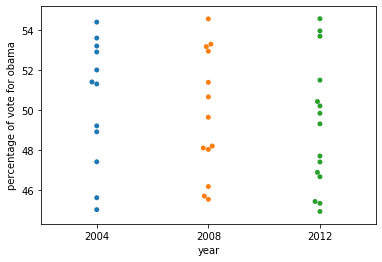

In [59]:
df_MS = df_2004_MS.append(df_2008_MS)
df_MS = df_MS.append(df_2012_MS)

_= sns.swarmplot(x='year',y='pct_dem', data=df_MS)
_=plt.xlabel('year')
_=plt.ylabel('percentage of vote for obama')
plt.show()


This graph show the percentage of vote for obama in every year in MS state and we show the max percentage in 3 years is aproximately 60 

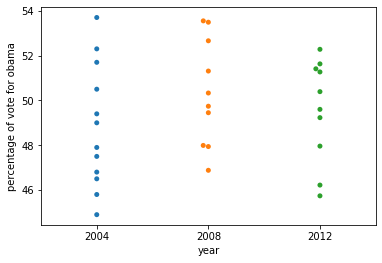

In [60]:
df_SC = df_2004_SC.append(df_2008_SC)
df_SC = df_SC.append(df_2012_SC)

_= sns.swarmplot(x='year',y='pct_dem', data=df_SC)
_=plt.xlabel('year')
_=plt.ylabel('percentage of vote for obama')
plt.show()

This graph show the percentage of vote for obama in every year in SC state and we show the max percentage in 2004 is aproximately 54 but less in 2012 

<function matplotlib.pyplot.show(*args, **kw)>

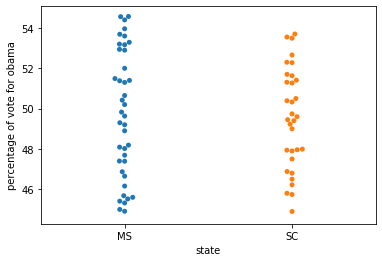

In [130]:
data = df_2004_MS.append(df_2008_MS)
data = data.append(df_2012_MS)
data = data.append(df_2004_SC)
data = data.append(df_2008_SC)
data = data.append(df_2012_SC)

_= sns.swarmplot(x='state',y='pct_dem', data=data)
_=plt.xlabel('state')
_=plt.ylabel('percentage of vote for obama')
plt.show


This graph show the percentage of vote for obama in two state 'MS' and 'SC' and we show the percentage close together in both states

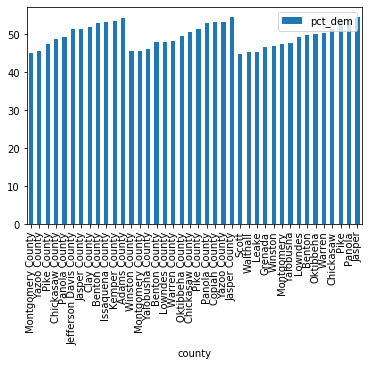

In [123]:
df_MS = df_2004_MS.append(df_2008_MS)
df_MS = df_MS.append(df_2012_MS)

dataMS = df_MS.plot.bar(x='county' , y='pct_dem' , rot=90)

This graph show the percentage of vote for obama in every county when the margin winner over runnerup in this county in every year <=10 in MS state and we show the max percentage in 'Adams County' and 'Jasper County'

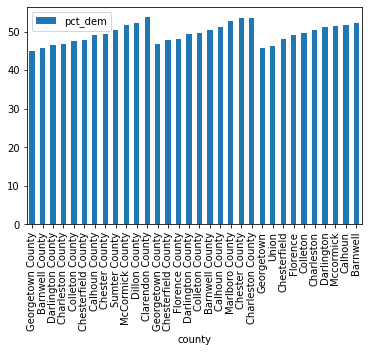

In [133]:
df_SC = df_2004_SC.append(df_2008_SC)
df_SC = df_SC.append(df_2012_SC)

dataSC = df_SC.plot.bar(x='county' , y='pct_dem' , rot=90)

This graph show the percentage of vote for obama in every county when the margin winner over runnerup in this county in every year <=10 in SC state and we show the max percentage in 'Clarendon County' and 'Chester County' and 'Charleston County'

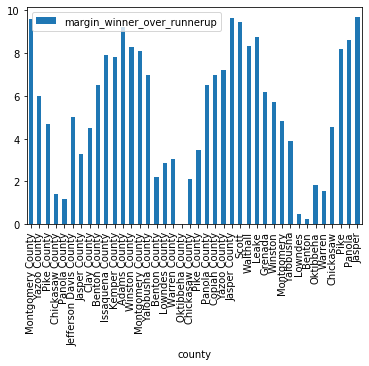

In [131]:
dataMS = df_MS.plot.bar(x='county' , y='margin_winner_over_runnerup' , rot=90)

This graph show the margin winner over runnerup in each county when  margin winner over runnerup<=10 in MS state and we show the lowest margin in'Benton  County' and the margin=0 in 'Okitbbeha County'

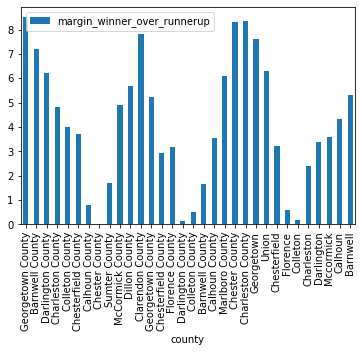

In [132]:
dataSC= df_SC.plot.bar(x='county' , y='margin_winner_over_runnerup' , rot=90)

This graph show the margin winner over runnerup in each county when  margin winner over runnerup<=10 in SC state and we show the lowest margin in'Darlington County' and 'Colleton County' and the margin=0 in 'Chester County'

# Summary

if we want 'dem' become a winner in 2020 and we want to depant on the percentage of vote in every county it is better to focus on 'Adams County' and 'Jasper County' in MS state and 'Clarendon County' , 'Chester County' and 'Charleston County' in SC state , but if we want to depant on the least margin it is better to focus on 'Benton  County' and 'Okitbbeha County' in MS state and 'Darlington County', 'Colleton County' and 'Chester County' in SC state .